# Explore here

In [15]:
# Your code here

import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")


In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
df.drop(["HouseAge","AveBedrms","AveRooms","Population","AveOccup","MedHouseVal"],inplace=True, axis=1)

In [18]:
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [19]:
from sklearn.model_selection import train_test_split

X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [20]:
# Generar un conjunto de datos de ejemplo
from sklearn.cluster import KMeans



# Entrenar el modelo

model = KMeans(n_clusters = 6, random_state = 42)

model.fit(X_train)



KMeans(n_clusters=6, random_state=42)

In [21]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [22]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

/tmp/ipykernel_3485/3109179864.py:7: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = axis[0], data = X_train, x = "Longitude", y = "Latitude",hue='cluster', palette = palette)
/tmp/ipykernel_3485/3109179864.py:8: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = axis[1], data = X_train, x = 'Longitude', y = "MedInc",hue='cluster',  palette = palette)
/tmp/ipykernel_3485/3109179864.py:9: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(ax = axis[2], data = X_train, x = 'Latitude', y = "MedInc",hue='cluster',  palette = palette)


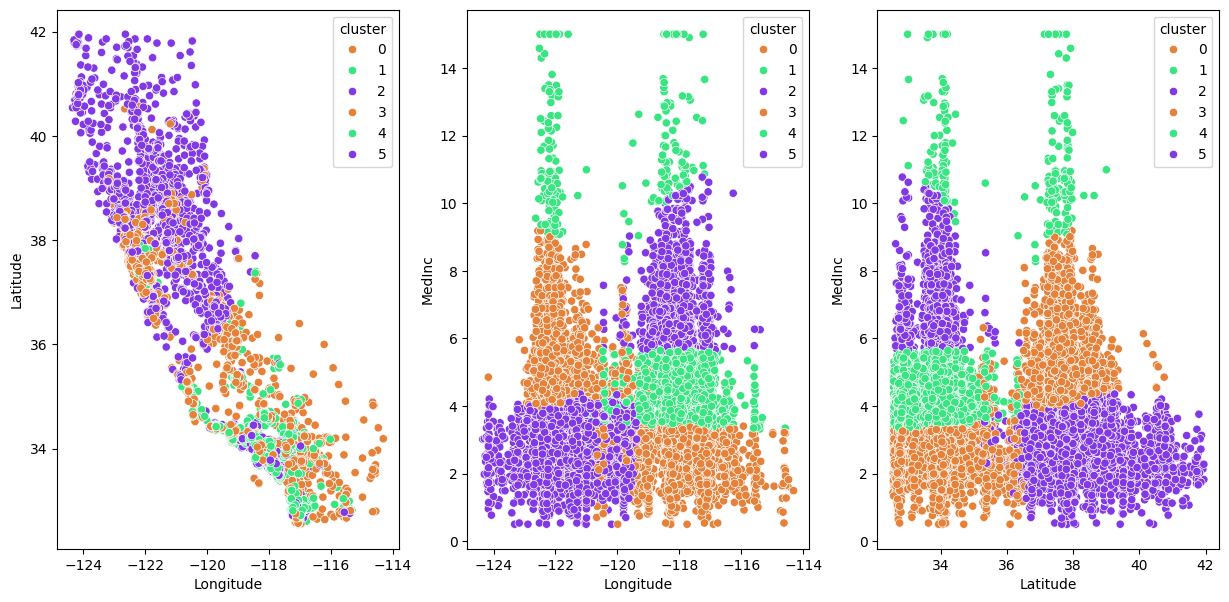

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 7))

palette = ["#E58139", "#39E581", "#8139E5"]
sns.scatterplot(ax = axis[0], data = X_train, x = "Longitude", y = "Latitude",hue='cluster', palette = palette)
sns.scatterplot(ax = axis[1], data = X_train, x = 'Longitude', y = "MedInc",hue='cluster',  palette = palette)
sns.scatterplot(ax = axis[2], data = X_train, x = 'Latitude', y = "MedInc",hue='cluster',  palette = palette)
plt.show()

In [33]:
#predecir con el conjunto de prueba
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


In [24]:
from sklearn.decomposition import PCA


feature_names = X_train.columns
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [25]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_train)

In [26]:
X_pca_d = pd.DataFrame(data=X_pca, columns=['PCA1','PCA2'])
X_pca_d

,PCA1,PCA2
0,-3.448273,-1.831745
1,-2.679151,0.146554
2,-0.633016,1.144206
3,-3.241375,-2.844844
4,1.725251,-1.359873
...,...,...
16507,-2.821704,1.550966
16508,-2.253022,-1.691149
16509,-1.629569,-1.538033
16510,1.833811,3.742610


In [27]:
### Varianza emplecada por las componentes
var = pca.explained_variance_ratio_
var

array([0.5713051 , 0.30521952])

In [28]:
### Acumulación de la explicación de las componentes
import numpy as np
cumsu = np.cumsum(var)
print(np.cumsum(var))

[0.5713051  0.87652462]


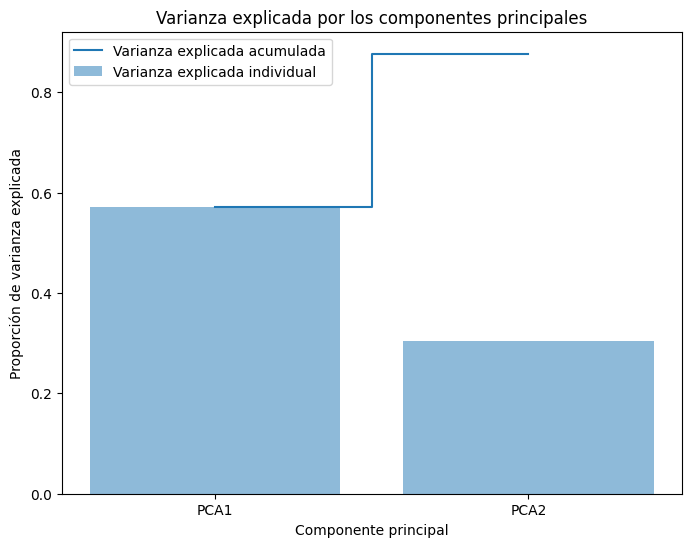

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['PCA1','PCA2'], var, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(['PCA1','PCA2'], cumsu, where='mid', label='Varianza explicada acumulada')
plt.xlabel('Componente principal')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por los componentes principales')
plt.legend(loc='best')
plt.show()

In [30]:
componet = pca.components_